In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [186]:
pd.set_option('display.max_columns', None)

## 데이터 로드 및 전처리

In [192]:
# 행복도 csv load
happy_df = pd.read_csv("csv/happiness.csv")
happy_df.head()

,구분별(1),구분별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,구분별(1),구분별(2),행복지수 종합,항목별 행복지수,항목별 행복지수,항목별 행복지수,항목별 행복지수,항목별 행복지수
1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
2,서울시,소계,6.7184596,7.2067965,6.1161352,6.7823744,6.8869873,6.6000048
3,성별,남성,6.7476923,7.2978792,6.1248071,6.7976944,6.8956674,6.6224135
4,성별,여성,6.6913339,7.1222786,6.1080883,6.7681586,6.8789328,6.5792112


In [187]:
# 공원율 csv load
park_df = pd.read_csv("csv/park.csv")
park_df.head()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6
0,자치구별(1),자치구별(2),행정구역면적,공원면적,공원면적,자연공원(국립)면적,도시자연공원구역면적,도시계획시설(공원) 및 기타공원,도시계획시설(공원) 및 기타공원
1,자치구별(1),자치구별(2),소계,소계,공원율 (%),소계,소계,조성면적,미조성면적
2,합계,소계,605208149,173024061,28.59,37517000,69221413,63708693,2576954
3,합계,종로구,23913162,11434590,47.82,5030000,3315969,3021205,67416
4,합계,중구,9960287,3206189,32.19,-,1789846,1389982,26362


In [188]:
# 1인당 공원면적 csv load
park_per_df = pd.read_csv("csv/park_per.csv")
park_per_df.head()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,자치구별(1),자치구별(2),공원,공원,도시공원,도시공원,도보생활권공원,도보생활권공원
1,자치구별(1),자치구별(2),면적 (천㎡),1인당 공원면적 (㎡),면적 (천㎡),1인당 공원면적 (㎡),면적 (천㎡),1인당 공원면적 (㎡)
2,합계,소계,173024.06,17.90,119335.16,12.34,55225.65,5.71
3,합계,종로구,11434.59,75.12,6236.64,40.97,3021.20,19.85
4,합계,중구,3206.19,24.51,3118.86,23.85,1389.98,10.63


In [189]:
# 편의시설 csv load
facilities_df = pd.read_csv("csv/facilities.csv")
facilities_df.head()

,"Ⅰ. 기반시설, 조경시설, 휴양시설, 유희시설(총괄)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,"Ⅱ. 운동시설, 교양시설(총괄)",Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,"Ⅲ. 편익시설, 관리시설(총괄)",Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Ⅳ. 건물현황(총괄),Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,관 리 청 별,기 반 시 설,NaN,NaN,조 경 시 설,NaN,NaN,NaN,NaN,NaN,NaN,휴 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,유 희 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,운 동 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,운 동 시 설,NaN,NaN,NaN,NaN,교 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,편 익 시 설,NaN,NaN,NaN,NaN,NaN,편 익 시 설,NaN,NaN,NaN,NaN,NaN,NaN,관 리 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,적 법 건 물,NaN,부 적 격 건 물,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,광 장,도 로,산책등산로,관상용식수대,그늘\n시렁\n(개소),연 못,분수\n(기),조각\n(소),기 타,NaN,야영장\n야유회장,정 자(㎡),노인정(㎡),야외\n탁자\n(기),장의자\n(기),기 타,NaN,그네\n(기),미끄\n럼틀\n(기),모래\n밭\n(기),시소\n(기),정글\n짐\n(기),사닥\n다리\n(기),조합\n놀이\n(기),유료시설,NaN,기 타,NaN,NaN,운동장,테니스장,"수영장(실내,㎡)",수영장(실외),궁도\n장\n(소),야구\n장\n(소),축구\n장\n(소),농구\n장\n(소),배구\n장\n(소),배드민턴장,골프연습장,게이\n트볼\n(소),체력단련시설,NaN,기 타,NaN,동물원,식물원,도서관\n독서실,문화회관,야외\n음악당\n(소),동상\n(기),탑기\n념비\n(기),기 타,NaN,NaN,주 차 장,휴게음식점(식당),매 점,자판기,화장실(수세식),발효식\n화장실\n(기),간 이\n화장실\n(기),공중\n전화\n(기),음수대\n(기),샘터\n(소),시계탑\n(기),기 타,NaN,관리사무소,휀 스,공원등\n(기),안 내 판 (기),NaN,NaN,기 타,NaN,NaN,NaN,NaN,계,NaN,유 허 가,NaN,무 허 가,NaN,NaN,NaN
3,NaN,개소,노선,노선,개소,NaN,개소,NaN,NaN,종,기,개소,동,동,NaN,NaN,종,기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종,기,종,기,NaN,개소,개소,개소,개소,NaN,NaN,NaN,NaN,NaN,개소,개소,NaN,개소,기,종,기,개소,개소,개소,개소,NaN,NaN,NaN,종,기,NaN,개소,개소,개소,NaN,개소,NaN,NaN,NaN,NaN,NaN,NaN,종,기,개소,개소,NaN,종합,시설,기타,종,기,NaN,동,면적(㎡),동,면적(㎡),동,면적(㎡),동,면적(㎡),NaN,NaN
4,합 계,\t818,\t697,"\t1,418",\t925,"\t2,074",\t238,\t301,\t409,\t352,\t824,\t96,"\t1,965",\t216,"\t2,134","\t39,322",\t669,"\t3,402",\t849,\t144,\t392,\t525,\t36,\t13,"\t1,412",\t100,\t293,"\t1,400","\t2,740",합 계,\t132,"\t2,453",\t5,\t10,\t7,\t13,\t57,\t200,\t29,\t450,"\t3,785",\t116,"\t3,791","\t19,395","\t1,014","\t1,441",\t18,\t13,\t39,\t37,\t80,\t46,\t115,\t167,\t202,합 계,\t236,\t58,\t89,\t24,\t894,\t92,\t138,\t174,"\t1,346",\t203,\t69,\t66,\t490,\t268,"\t1,445","\t43,086","\t1,140","\t8,237","\t3,446",\t694,"\t4,410",합 계,"\t1,671","\t632,648.95","\t1,778","\t108,152.49",\t630,"\t49,141.25","\t2,166","\t144,661.79",NaN,NaN


In [193]:
# 행복도 df 전처리
happy_df.columns = happy_df.iloc[1]
happy_df.drop([0, 1], axis=0, inplace=True)
happy_df.reset_index(drop=True, inplace=True)

In [194]:
happy_df.head()

1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
0,서울시,소계,6.7184596,7.2067965,6.1161352,6.7823744,6.8869873,6.6000048
1,성별,남성,6.7476923,7.2978792,6.1248071,6.7976944,6.8956674,6.6224135
2,성별,여성,6.6913339,7.1222786,6.1080883,6.7681586,6.8789328,6.5792112
3,연령별,10대,6.9124685,7.6750149,5.783973,7.1061859,7.1429177,6.8542511
4,연령별,20대,6.9807589,7.7308668,6.0822969,7.1077906,7.0724683,6.9103721


In [195]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   구분별(1)         55 non-null     object
 1   구분별(2)         55 non-null     object
 2   소계             55 non-null     object
 3   자신의 건강상태       55 non-null     object
 4   자신의 재정상태       55 non-null     object
 5   주위 친지 친구와의 관계  55 non-null     object
 6   가정생활           55 non-null     object
 7   사회생활           55 non-null     object
dtypes: object(8)
memory usage: 3.6+ KB


In [196]:
# 컬럼 타입 변경
happy_df = happy_df.astype(
    {
        "소계": "float",
        "자신의 건강상태": "float",
        "자신의 재정상태": "float",
        "주위 친지 친구와의 관계": "float",
        "가정생활": "float",
        "사회생활": "float",
    }
)

In [197]:
happy_df.dtypes

1
구분별(1)            object
구분별(2)            object
소계               float64
자신의 건강상태         float64
자신의 재정상태         float64
주위 친지 친구와의 관계    float64
가정생활             float64
사회생활             float64
dtype: object

In [198]:
happy_df.head()

1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
0,서울시,소계,6.718460,7.206797,6.116135,6.782374,6.886987,6.600005
1,성별,남성,6.747692,7.297879,6.124807,6.797694,6.895667,6.622414
2,성별,여성,6.691334,7.122279,6.108088,6.768159,6.878933,6.579211
3,연령별,10대,6.912469,7.675015,5.783973,7.106186,7.142918,6.854251
4,연령별,20대,6.980759,7.730867,6.082297,7.107791,7.072468,6.910372


In [199]:
# 공원율 df 전처리
merged_row = park_df.iloc[0, 2:] + " " + park_df.iloc[1, 2:]
park_df.iloc[1, 2:] = merged_row
park_df.columns = park_df.iloc[1]
park_df.drop([0, 1], axis=0, inplace=True)
park_df = park_df.iloc[1:-1, 1:]
park_df.reset_index(drop=True, inplace=True)

In [200]:
park_df.head()

1,자치구별(2),행정구역면적 소계,공원면적 소계,공원면적 공원율 (%),자연공원(국립)면적 소계,도시자연공원구역면적 소계,도시계획시설(공원) 및 기타공원 조성면적,도시계획시설(공원) 및 기타공원 미조성면적
0,종로구,23913162,11434590,47.82,5030000,3315969,3021205,67416
1,중구,9960287,3206189,32.19,-,1789846,1389982,26362
2,용산구,21867610,1773967,8.11,-,54875,1611081,108011
3,성동구,16820272,3083766,18.33,-,72648,2905866,105253
4,광진구,17062837,3459842,20.28,-,2097470,1351388,10984


In [201]:
park_df = park_df.replace("-", "0")

In [202]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   자치구별(2)                  25 non-null     object
 1   행정구역면적 소계                25 non-null     object
 2   공원면적 소계                  25 non-null     object
 3   공원면적 공원율 (%)             25 non-null     object
 4   자연공원(국립)면적 소계            25 non-null     object
 5   도시자연공원구역면적 소계            25 non-null     object
 6   도시계획시설(공원) 및 기타공원 조성면적   25 non-null     object
 7   도시계획시설(공원) 및 기타공원 미조성면적  25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB


In [203]:
park_df = park_df.astype(
    {
        "행정구역면적 소계": "float",
        "공원면적 소계": "float",
        "공원면적 공원율 (%)": "float",
        "자연공원(국립)면적 소계": "float",
        "도시자연공원구역면적 소계": "float",
        "도시계획시설(공원) 및 기타공원 조성면적": "float",
        "도시계획시설(공원) 및 기타공원 미조성면적": "float"
    }
)

In [204]:
park_df.dtypes

1
자치구별(2)                     object
행정구역면적 소계                  float64
공원면적 소계                    float64
공원면적 공원율 (%)               float64
자연공원(국립)면적 소계              float64
도시자연공원구역면적 소계              float64
도시계획시설(공원) 및 기타공원 조성면적     float64
도시계획시설(공원) 및 기타공원 미조성면적    float64
dtype: object

In [205]:
# 1인당 공원면적 df 전처리
merged_row = park_per_df.iloc[0, 2:] + " " + park_per_df.iloc[1, 2:]
park_per_df.iloc[1, 2:] = merged_row
park_per_df.columns = park_per_df.iloc[1]
park_per_df.drop([0, 1], axis=0, inplace=True)
park_per_df = park_per_df.iloc[1:-1, 1:]
park_per_df.reset_index(drop=True, inplace=True)

In [206]:
park_per_df.head()

1,자치구별(2),공원 면적 (천㎡),공원 1인당 공원면적 (㎡),도시공원 면적 (천㎡),도시공원 1인당 공원면적 (㎡),도보생활권공원 면적 (천㎡),도보생활권공원 1인당 공원면적 (㎡)
0,종로구,11434.59,75.12,6236.64,40.97,3021.20,19.85
1,중구,3206.19,24.51,3118.86,23.85,1389.98,10.63
2,용산구,1773.97,7.60,757.52,3.25,1611.08,6.91
3,성동구,3083.77,10.70,1230.96,4.27,2905.87,10.08
4,광진구,3459.84,9.85,2993.93,8.52,1351.39,3.85


In [207]:
park_per_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구별(2)               25 non-null     object
 1   공원 면적 (천㎡)            25 non-null     object
 2   공원 1인당 공원면적 (㎡)       25 non-null     object
 3   도시공원 면적 (천㎡)          25 non-null     object
 4   도시공원 1인당 공원면적 (㎡)     25 non-null     object
 5   도보생활권공원 면적 (천㎡)       25 non-null     object
 6   도보생활권공원 1인당 공원면적 (㎡)  25 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


In [208]:
park_per_df = park_per_df.astype(
    {
        "공원 면적 (천㎡)": "float",
        "공원 1인당 공원면적 (㎡)": "float",
        "도시공원 면적 (천㎡)": "float",
        "도시공원 1인당 공원면적 (㎡)": "float",
        "도보생활권공원 면적 (천㎡)": "float",
        "도보생활권공원 1인당 공원면적 (㎡)": "float"
    }
)

In [209]:
park_per_df.dtypes

1
자치구별(2)                  object
공원 면적 (천㎡)              float64
공원 1인당 공원면적 (㎡)         float64
도시공원 면적 (천㎡)            float64
도시공원 1인당 공원면적 (㎡)       float64
도보생활권공원 면적 (천㎡)         float64
도보생활권공원 1인당 공원면적 (㎡)    float64
dtype: object

In [210]:
# 편의시설 csv load
facilities_df = pd.read_csv("csv/facilities.csv")

In [211]:
# 편의시설 df 전처리
facilities_df.columns = facilities_df.iloc[1]
facilities_df = facilities_df.iloc[[2,3] + list(range(16, len(facilities_df))), :-11]

# \t, \n 삭제하는 함수
def remove_tab_newline(cell):
    if isinstance(cell, str):
        return cell.replace('\t', '').replace('\n', '')
    else:
        return cell

facilities_df = facilities_df.applymap(remove_tab_newline)

In [212]:
facilities_df.head()

1,관 리 청 별,기 반 시 설,NaN,NaN,조 경 시 설,NaN,NaN,NaN,NaN,NaN,NaN,휴 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,유 희 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,운 동 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,운 동 시 설,NaN,NaN,NaN,NaN,교 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,편 익 시 설,NaN,NaN,NaN,NaN,NaN,편 익 시 설,NaN,NaN,NaN,NaN,NaN,NaN,관 리 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,광 장,도 로,산책등산로,관상용식수대,그늘시렁(개소),연 못,분수(기),조각(소),기 타,NaN,야영장야유회장,정 자(㎡),노인정(㎡),야외탁자(기),장의자(기),기 타,NaN,그네(기),미끄럼틀(기),모래밭(기),시소(기),정글짐(기),사닥다리(기),조합놀이(기),유료시설,NaN,기 타,NaN,NaN,운동장,테니스장,"수영장(실내,㎡)",수영장(실외),궁도장(소),야구장(소),축구장(소),농구장(소),배구장(소),배드민턴장,골프연습장,게이트볼(소),체력단련시설,NaN,기 타,NaN,동물원,식물원,도서관독서실,문화회관,야외음악당(소),동상(기),탑기념비(기),기 타,NaN,NaN,주 차 장,휴게음식점(식당),매 점,자판기,화장실(수세식),발효식화장실(기),간 이화장실(기),공중전화(기),음수대(기),샘터(소),시계탑(기),기 타,NaN,관리사무소,휀 스,공원등(기),안 내 판 (기),NaN,NaN,기 타,NaN
3,NaN,개소,노선,노선,개소,NaN,개소,NaN,NaN,종,기,개소,동,동,NaN,NaN,종,기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종,기,종,기,NaN,개소,개소,개소,개소,NaN,NaN,NaN,NaN,NaN,개소,개소,NaN,개소,기,종,기,개소,개소,개소,개소,NaN,NaN,NaN,종,기,NaN,개소,개소,개소,NaN,개소,NaN,NaN,NaN,NaN,NaN,NaN,종,기,개소,개소,NaN,종합,시설,기타,종,기
16,종 로 구,17,30,43,10,64,3,5,14,5,5,- 0,45,2,2,"1,386",16,94,5,2,10,3,1,- 0,24,- 0,- 0,19,32,종 로 구,6,3,- 0,- 0,1,- 0,- 0,3,- 0,13,- 0,- 0,43,748,46,106,- 0,- 0,2,- 0,1,9,24,8,7,종 로 구,1,3,2,1,40,- 0,6,20,43,16,- 0,- 0,- 0,11,34,987,72,81,159,8,28
17,중 구,33,27,21,- 0,18,2,6,1,1,12,- 0,31,2,- 0,505,4,13,11,2,2,10,2,1,17,- 0,- 0,15,30,중 구,- 0,1,- 0,- 0,- 0,- 0,1,- 0,- 0,3,- 0,2,62,205,- 0,- 0,- 0,- 0,2,1,1,2,3,2,2,중 구,6,- 0,- 0,- 0,10,- 0,1,4,26,- 0,2,- 0,- 0,6,14,448,16,22,10,8,56
18,용 산 구,17,7,11,4,42,25,7,5,5,17,- 0,34,7,28,614,13,20,19,2,4,4,- 0,- 0,34,- 0,- 0,30,59,용 산 구,2,2,- 0,- 0,- 0,- 0,- 0,1,- 0,5,- 0,3,85,455,1,1,- 0,- 0,- 0,1,56,3,2,3,3,용 산 구,5,- 0,1,- 0,17,- 0,- 0,3,18,- 0,1,1,1,5,56,728,14,33,76,3,12


In [213]:
# 관리청별 컬럼 하나만 남기기
gu = facilities_df["관 리 청 별"].iloc[2:, 0]
facilities_df = facilities_df.drop(columns=["관 리 청 별"])

In [214]:
facilities_df = facilities_df.replace(",", "", regex=True).replace(" - 0", "0")

In [215]:
facilities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 2 to 40
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   기   반   시   설  27 non-null     object
 1   nan            27 non-null     object
 2   nan            27 non-null     object
 3   조   경   시   설  27 non-null     object
 4   nan            26 non-null     object
 5   nan            27 non-null     object
 6   nan            26 non-null     object
 7   nan            26 non-null     object
 8   nan            27 non-null     object
 9   nan            26 non-null     object
 10  휴   양   시   설  27 non-null     object
 11  nan            27 non-null     object
 12  nan            27 non-null     object
 13  nan            26 non-null     object
 14  nan            26 non-null     object
 15  nan            27 non-null     object
 16  nan            26 non-null     object
 17  유   희   시   설  26 non-null     object
 18  nan            26 non-null     object

In [216]:
# 편의시설 종류별로 sum 하기 전, 불필요한 행 제거 및 타입 변환
facilities_df = facilities_df.drop([2,3])
facilities_df = facilities_df.astype(int)

In [217]:
facilities_df.dtypes

1
기   반   시   설    int64
NaN              int64
NaN              int64
조   경   시   설    int64
NaN              int64
                 ...  
NaN              int64
NaN              int64
NaN              int64
NaN              int64
NaN              int64
Length: 74, dtype: object

In [218]:
notna_cols = [idx for idx, col in enumerate(facilities_df.columns) if pd.notna(col)]
notna_cols

[0, 3, 10, 17, 28, 39, 44, 53, 59, 66]

In [182]:
notna = [col.replace(" ", "") for _, col in enumerate(facilities_df.columns) if pd.notna(col)]
notna

['기반시설',
 '조경시설',
 '휴양시설',
 '유희시설',
 '운동시설',
 '운동시설',
 '교양시설',
 '편익시설',
 '편익시설',
 '관리시설']

In [219]:
sum_results = []

for i in range(len(notna_cols)-1):
    sum_result = facilities_df.iloc[:, notna_cols[i]:notna_cols[i+1]].sum(axis=1)
    sum_results.append(sum_result)
sum_result = facilities_df.iloc[:, notna_cols[-1]:].sum(axis=1)
sum_results.append(sum_result)

sum_facilities_df = pd.DataFrame(sum_results)
sum_facilities_df = sum_facilities_df.T
sum_facilities_df.columns = notna
sum_facilities_df.head()

,기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설
16,90,106,1545,96,26,943,51,47,85,1380
17,81,40,555,90,5,269,13,16,33,580
18,35,105,716,152,10,545,68,23,24,927
19,41,56,1387,288,40,711,2,23,63,1122
20,30,25,773,214,19,557,4,30,27,835


In [220]:
facilities_df = pd.concat([gu.reset_index(drop=True), sum_facilities_df.reset_index(drop=True)], axis=1)
facilities_df.head()

,관 리 청 별,기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설
0,종 로 구,90,106,1545,96,26,943,51,47,85,1380
1,중 구,81,40,555,90,5,269,13,16,33,580
2,용 산 구,35,105,716,152,10,545,68,23,24,927
3,성 동 구,41,56,1387,288,40,711,2,23,63,1122
4,광 진 구,30,25,773,214,19,557,4,30,27,835


## EDA

In [221]:
# 소분류 개수 확인
happy_df.groupby('구분별(1)')['구분별(2)'].nunique()

구분별(1)
서울시       1
성별        2
소득별       5
연령별       6
지역대분류     5
지역소분류    25
직업분류      4
학력별       4
혼인상태별     3
Name: 구분별(2), dtype: int64

## 행복도 데이터 시각화

In [222]:
# 한글 폰트
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "AppleGothic"

In [223]:
# 대분류별 데이터 프레임 생성
gender_df = happy_df[happy_df["구분별(1)"] == "성별"]
age_df = happy_df[happy_df["구분별(1)"] == "연령별"]
edu_df = happy_df[happy_df["구분별(1)"] == "학력별"]
income_df = happy_df[happy_df["구분별(1)"] == "소득별"]
marital_df = happy_df[happy_df["구분별(1)"] == "혼인상태별"]
region_df = happy_df[happy_df["구분별(1)"] == "지역대분류"]
regionsub_df = happy_df[happy_df["구분별(1)"] == "지역소분류"]
job_df = happy_df[happy_df["구분별(1)"] == "직업분류"]

happy_df_list = [
    gender_df,
    age_df,
    edu_df,
    income_df,
    marital_df,
    region_df,
    regionsub_df,
    job_df,
]

In [224]:
# barplot 그리는 함수
def barplot_visualization(df) -> None:
    fig, ax = plt.subplots(figsize=(12, 4))
    df_melted = df.melt(
        id_vars=["구분별(1)", "구분별(2)"], var_name="Factors", value_name="Happiness"
    )
    sns.barplot(
        data=df_melted, x="Factors", y="Happiness", hue="구분별(2)", palette="coolwarm"
    )
    plt.xlabel("Factors")
    plt.ylabel("Happiness")
    plt.xticks(fontsize=8)
    plt.legend(bbox_to_anchor=(1, 0.5), fontsize=8)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
            "{:.2f}".format(p.get_height()),
            fontsize=7,
            color="black",
            ha="center",
            va="bottom",
        )
    plt.show()

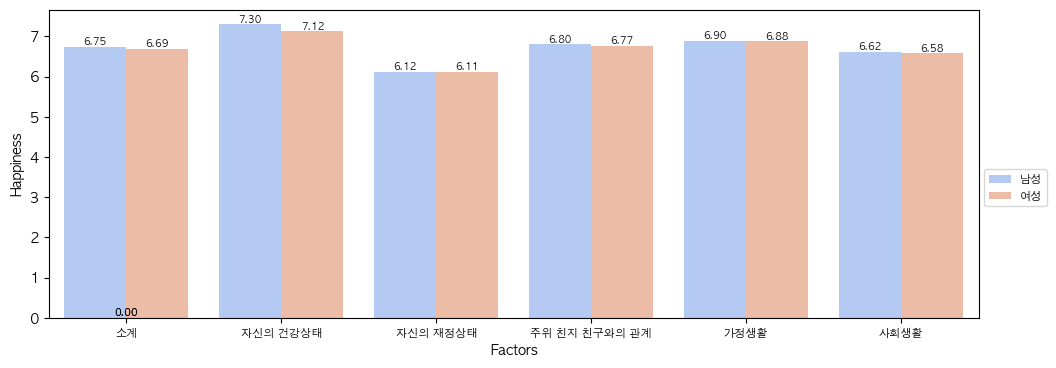

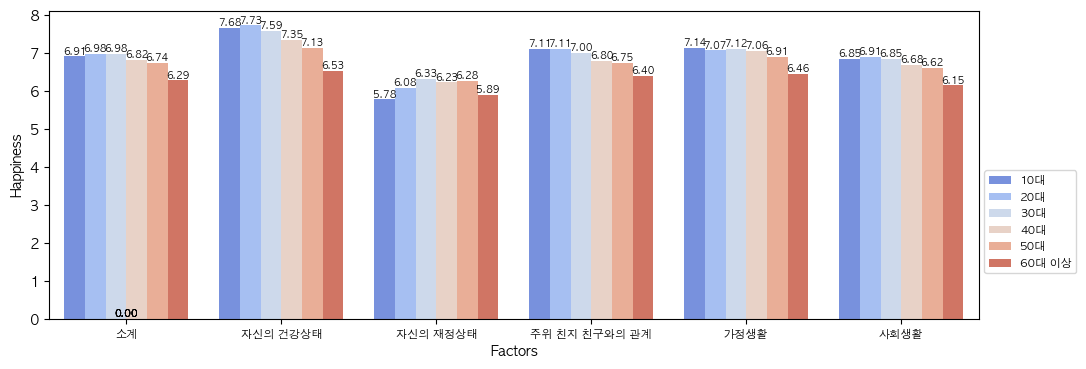

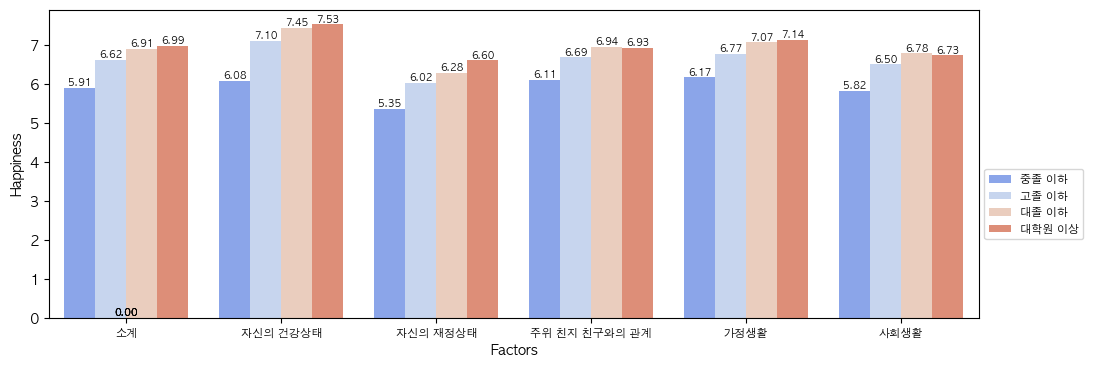

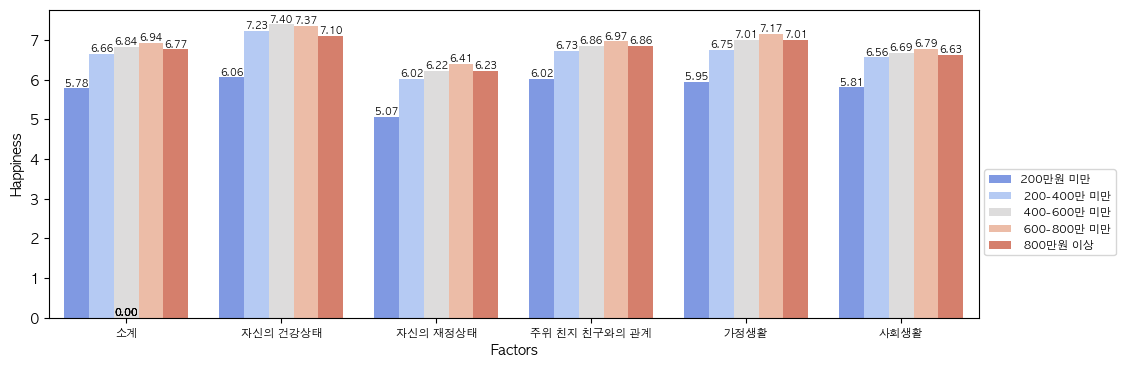

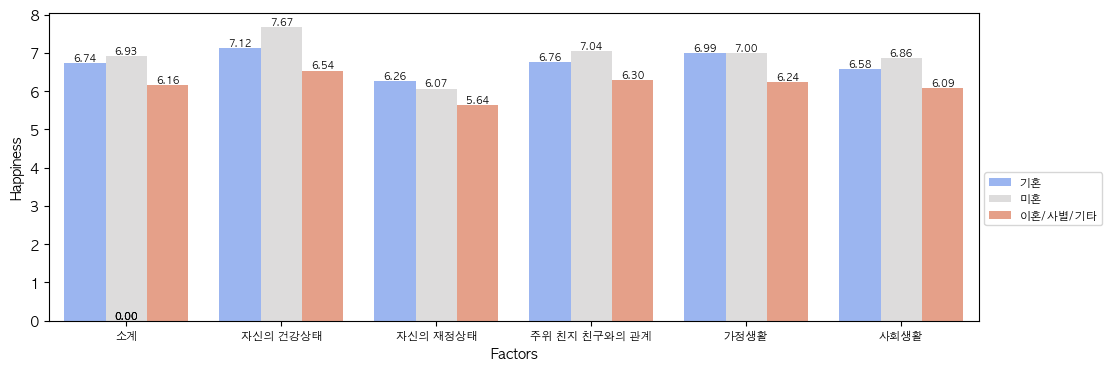

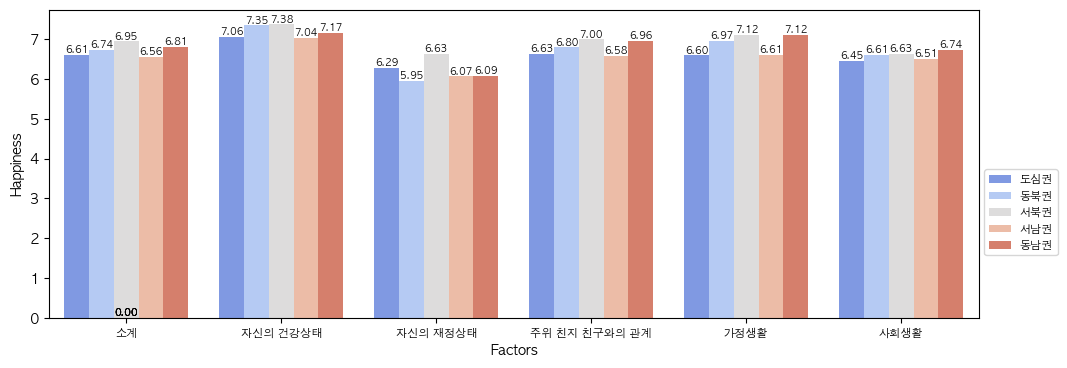

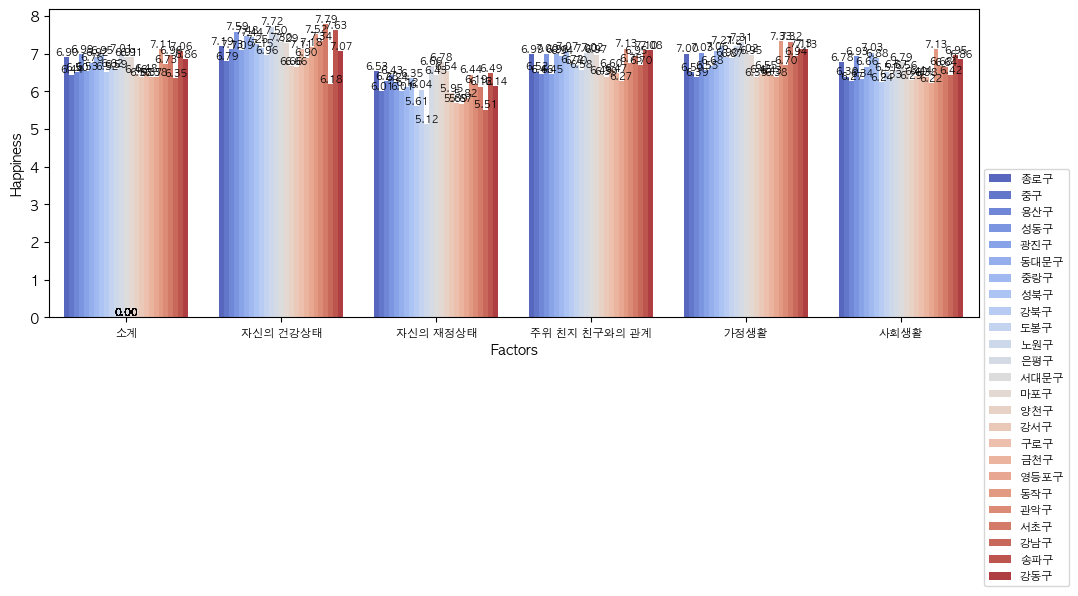

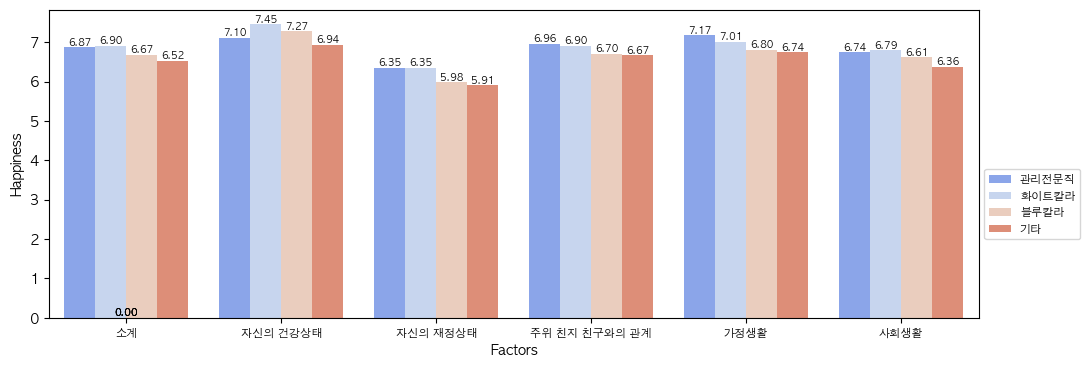

In [225]:
# 대분류별 시각화
for df in happy_df_list:
    barplot_visualization(df)

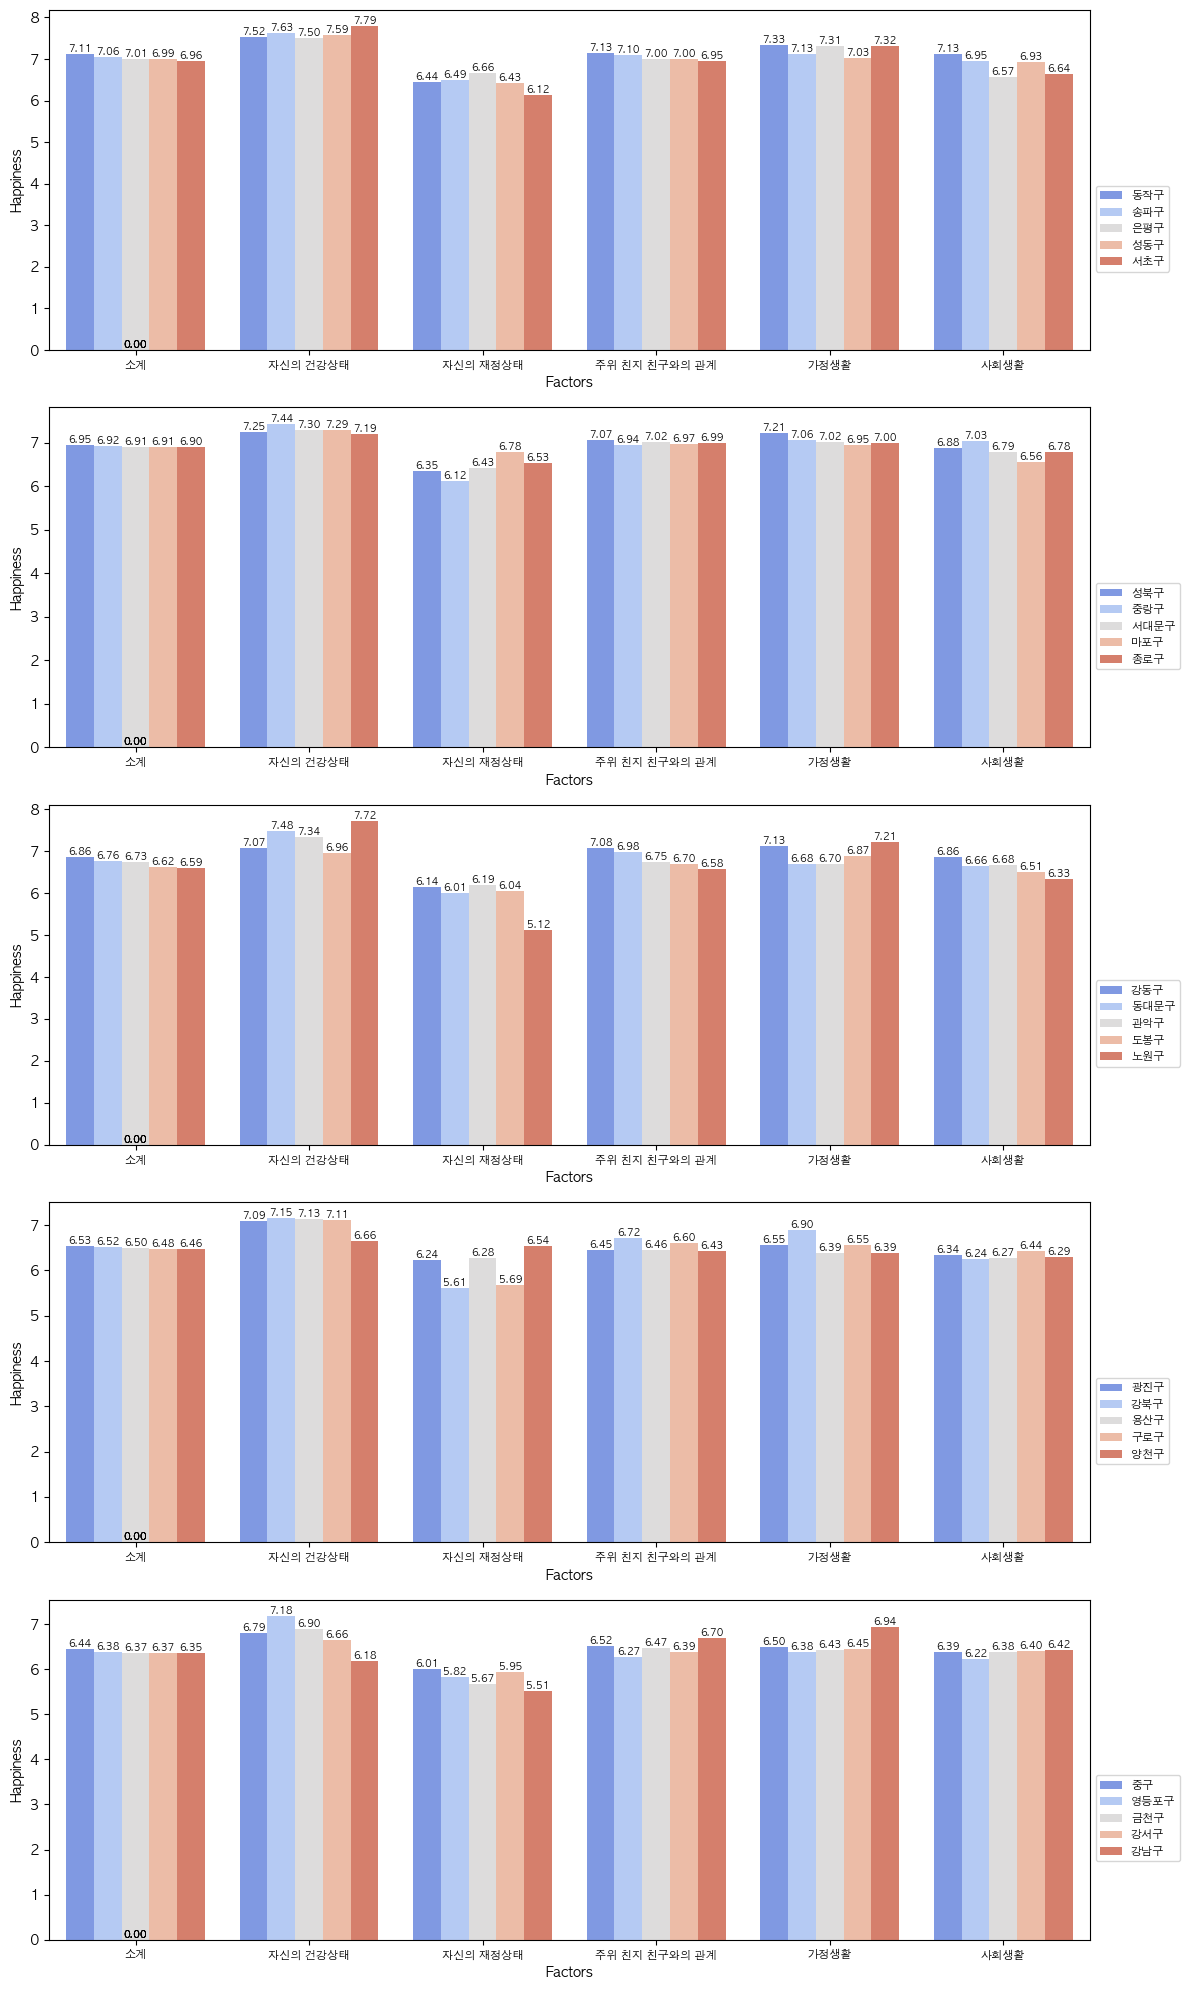

In [226]:
# 지역별 상세
fig, axes = plt.subplots(5, figsize=(12, 20))

# 소계 열을 기준으로 데이터프레임 정렬
regionsub_df_sorted = regionsub_df.sort_values(by="소계", ascending=False)

for i in range(5):  
    start_index = i * 5  # 각 서브플롯의 시작 인덱스
    end_index = (i + 1) * 5  # 각 서브플롯의 끝 인덱스
    sub_df = regionsub_df_sorted[start_index:end_index]
    sub_df_melted = sub_df.melt(
        id_vars=["구분별(1)", "구분별(2)"], var_name="Factors", value_name="Happiness"
    )  

    sns.barplot(
        data=sub_df_melted, x="Factors", y="Happiness", hue="구분별(2)", palette="coolwarm", ax=axes[i]
    ) 

    axes[i].set_xlabel("Factors")
    axes[i].set_ylabel("Happiness")
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].legend(bbox_to_anchor=(1, 0.5), fontsize=8)

    for p in axes[i].patches:
        axes[i].text(
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
            "{:.2f}".format(p.get_height()),
            fontsize=7,
            color="black",
            ha="center",
            va="bottom",
        )

plt.tight_layout()
plt.show()


In [230]:
# 지역별 > 요인별 상세
def regionsub_detail(regionsub_df, factor) -> None:
    fig, ax = plt.subplots(figsize=(12, 4))

    # 소계 열을 기준으로 데이터프레임 정렬
    regionsub_df_sorted = regionsub_df.sort_values(by=f"{factor}", ascending=False)

    df_melted = regionsub_df_sorted.melt(
        id_vars=["구분별(1)", "구분별(2)"], var_name="Factors", value_name="Happiness"
    )

    # "Factors" 열이 "소계"인 행만 필터링
    df_melted_subtotal = df_melted[df_melted["Factors"] == f"{factor}"]

    sns.barplot(
        data=df_melted_subtotal, x="Factors", y="Happiness", hue="구분별(2)", palette="coolwarm"
    )
    plt.xlabel("Factors")
    plt.ylabel("Happiness")
    plt.xticks(fontsize=8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
            "{:.2f}".format(p.get_height()),
            fontsize=7,
            color="black",
            ha="center",
            va="bottom",
        )
    plt.show()

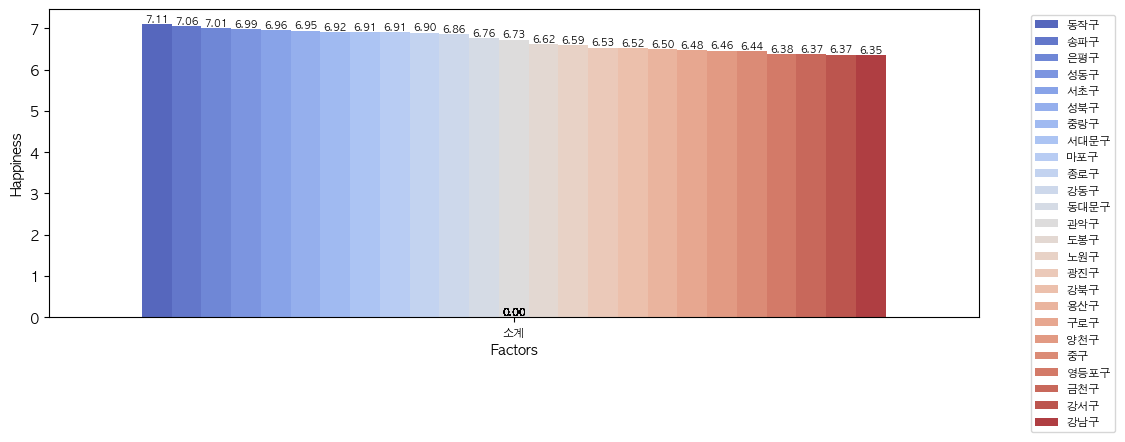

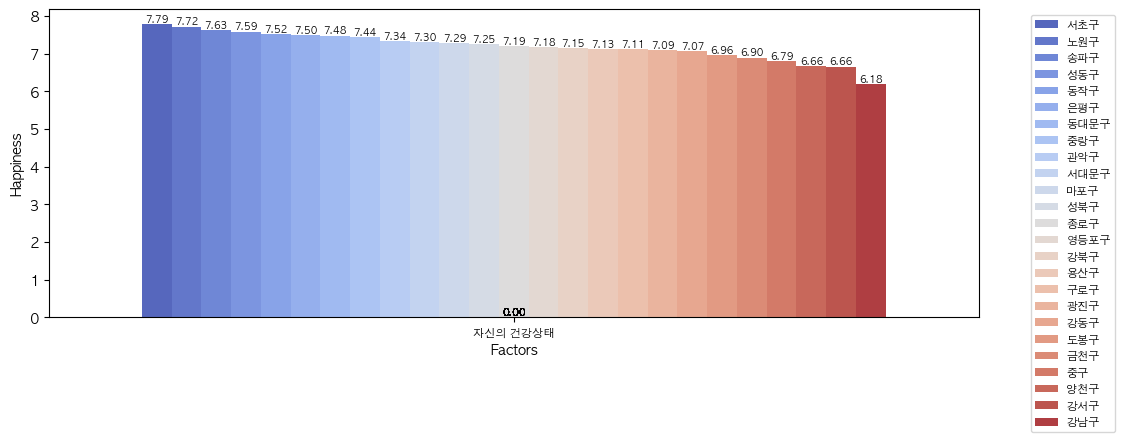

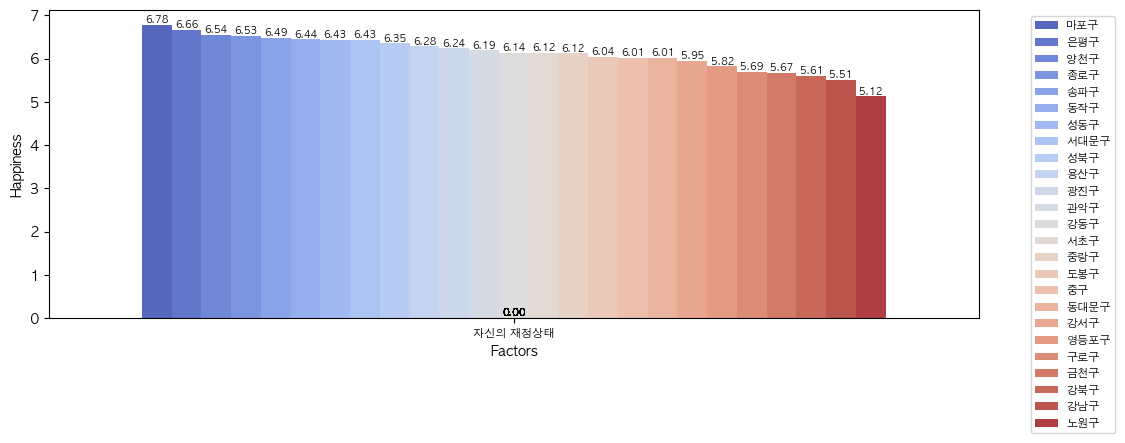

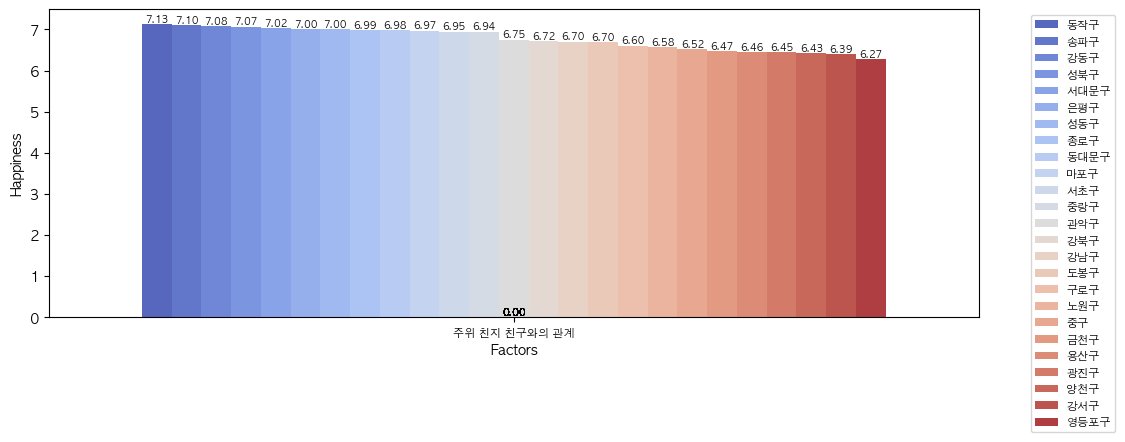

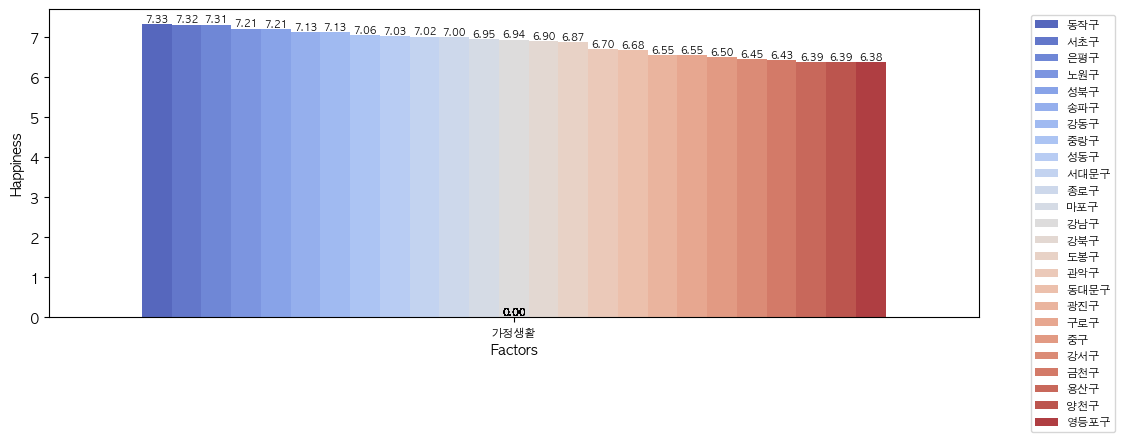

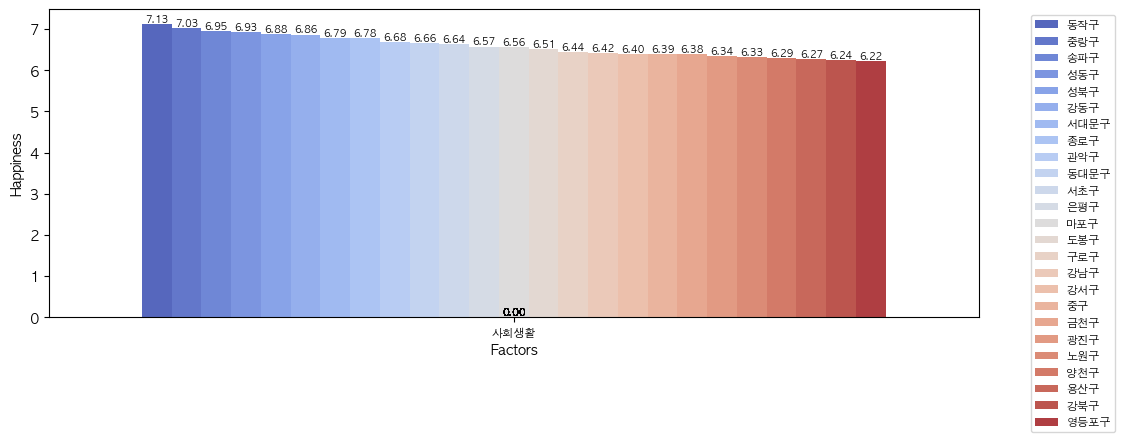

In [231]:
factors = ["소계", "자신의 건강상태", "자신의 재정상태", "주위 친지 친구와의 관계", "가정생활", "사회생활"]

for factor in factors:
    regionsub_detail(regionsub_df, factor)

## 공원 데이터 시각화

In [232]:
geo_data = {
        '지역': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
                '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
                '관악구', '서초구', '강남구', '송파구', '강동구'],
        '위도': [37.5730, 37.5647, 37.5314, 37.5635, 37.5420, 37.5744, 37.5975, 37.5891, 
                37.6418, 37.6688, 37.6552, 37.6026, 37.5651, 37.5549, 37.5171, 37.5510,
                37.4945, 37.4594, 37.5192, 37.5121, 37.4784, 37.4837, 37.4834, 37.4954, 37.5045],
        '경도': [126.9794, 126.9895, 126.9646, 127.0365, 127.0838, 127.0400, 127.0928, 127.0182,
                127.0146, 127.0458, 127.0778, 126.9294, 126.9385, 126.9058, 126.8663, 126.8495,
                126.8860, 126.8970, 126.8979, 126.9165, 126.9828, 126.9528, 127.0324, 127.1098, 127.0982]
        }

geo_df = pd.DataFrame(geo_data)

In [233]:
# 서울 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 마커 생성
for idx, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=park_df.loc[idx]["공원면적 공원율 (%)"],
        color="green",
        fill_color="green",
        fill_opacity=0.3,
        popup=f"{row['지역']} : {park_df.loc[idx, '공원면적 공원율 (%)']}%",
    ).add_to(seoul_map)

    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=park_per_df.loc[idx]["공원 1인당 공원면적 (㎡)"],
        color="blue",
        fill_color="blue",
        fill_opacity=0.3,
        popup=f"{row['지역']} : {park_per_df.loc[idx, '공원 1인당 공원면적 (㎡)']}%",
    ).add_to(seoul_map)

# 지도 표시
seoul_map